<a href="https://colab.research.google.com/github/mithai09/gfg/blob/main/ML_Project_Adult_Income_Classification_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective: Prediction task is to determine whether a person makes over 50K a year.

**Adult Income DataSet Description**
*****************************************************
**A). Number of Instances :-**
   48842 instances, mix of continuous and discrete
*****************************************************

**B). Number of Attributes :-**
   6 continuous, 8 nominal attributes.
*****************************************************

**C). Attribute Information:**

    1) age: continuous.
    2) workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    3) fnlwgt: continuous.
    4) education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    5) education-num: continuous.
    6) marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    7) occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    8) relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    9) race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    10)sex: Female, Male.
    11)capital-gain: continuous.
    12)capital-loss: continuous.
    13)hours-per-week: continuous.
    14)native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    15)class: >50K, <=50K

*****************************************************
**D. Missing Attribute Values:**
   7% have missing values


#Step-1 : Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Step-2: Read the adult income dataset

In [ ]:
data=pd.read_csv("adult_income_dataset.csv")

#Step-3: Exploratory Data Analytics

In [ ]:
print("data.shape = ", data.shape)

data.shape =  (48842, 15)


In [ ]:
print("Info about dataset\n", data.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
Info about dataset
 None


In [ ]:
#print first 10 rows of dataset
print("First 10 rows : \n")
data.head(10)

First 10 rows : 



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
print("data.describe() = \n" )
data.describe()

data.describe() = 



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
print("data.describe(include='object') = \n" )
data.describe(include='object')

data.describe(include='object') = 



,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [ ]:
print("data.income.unique() = \n" )
data.income.unique()

data.income.unique() = 



array(['<=50K', '>50K'], dtype=object)

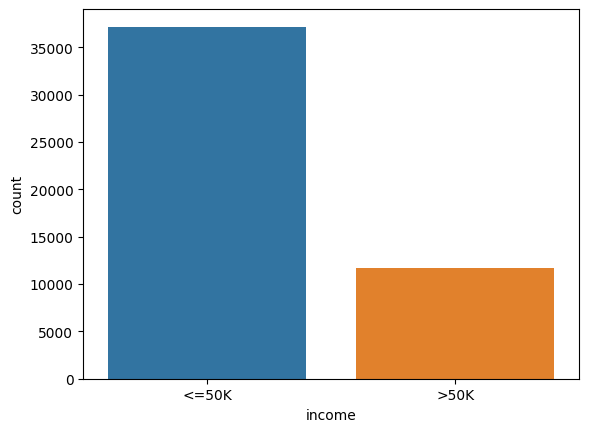

In [ ]:
#data.income=data.income.replace(['<=50K', '>50K'],[0,1])
sns.countplot(data=data, x="income")
plt.show()

#Feature Analysis and Vizualization

##Vizualization-01: Income vs Age

In [ ]:
print("data.age.unique() = \n", sorted(data.age.unique()))

data.age.unique() = 
 [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


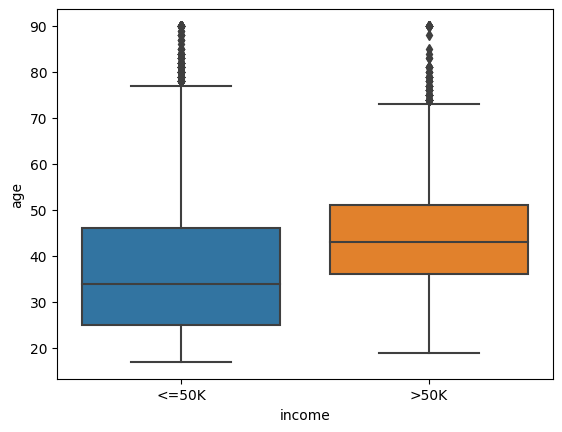

In [ ]:
#sns.boxplot(data.income, data.age)
sns.boxplot(x="income", y="age", data=data)
plt.show()

##Vizualization-02:  Income vs fnlwgt

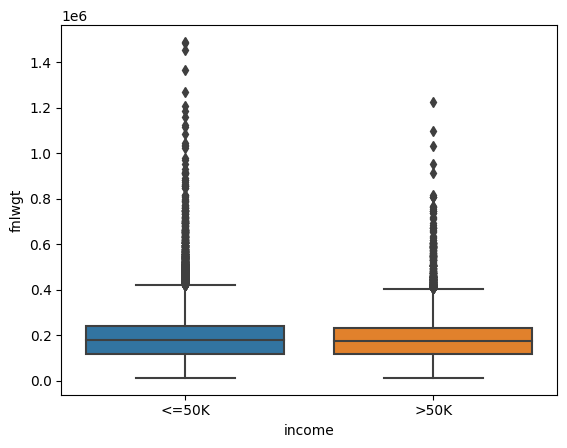

In [ ]:
#sns.boxplot(data.income,data['fnlwgt'])
sns.boxplot(x="income", y="fnlwgt", data=data)
plt.show()

##Vizualization-03:  Income vs educational-num

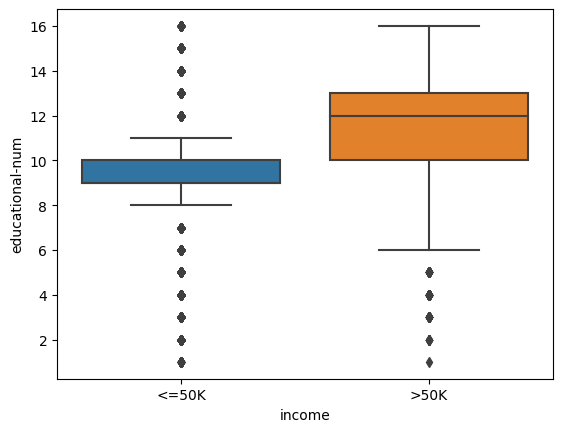

In [ ]:
#sns.boxplot(data.income,data['educational-num'])
sns.boxplot(x="income", y="educational-num", data=data)
plt.show()

##Vizualization-04:  Income vs capital-gain

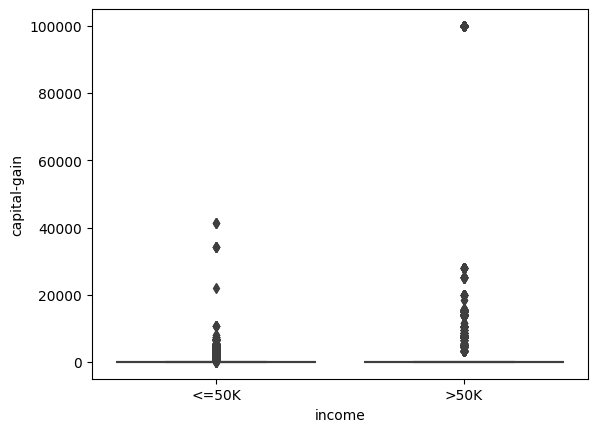

In [ ]:
#sns.boxplot(data.income,data['capital-gain'])
sns.boxplot(x="income", y="capital-gain", data=data)
plt.show()

##Vizualization-05:  Income vs capital-loss

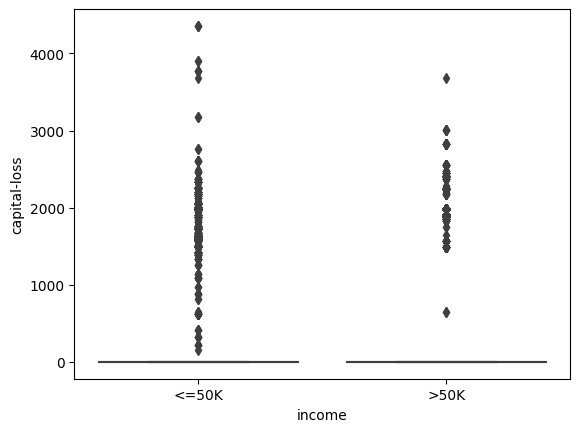

In [ ]:
#sns.boxplot(data.income,data['capital-loss'])
sns.boxplot(x="income", y="capital-loss", data=data)
plt.show()

##Vizualization-07:  Income vs hours-per-week

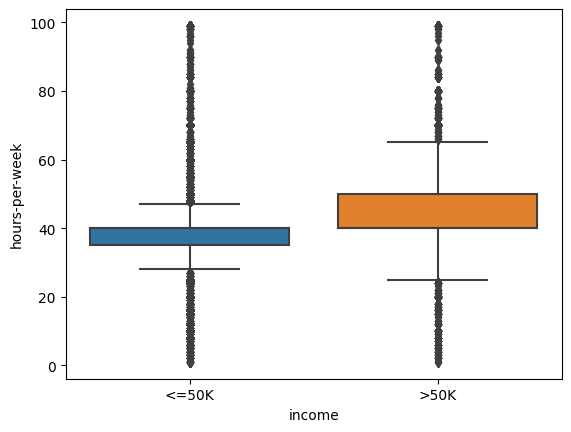

In [ ]:
#sns.boxplot(data.income,data['hours-per-week'])
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

##Print the details for missing values

In [ ]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

##Remove the missing values if any

In [ ]:
data=data.dropna()

##Replace the income class with numeric values


In [ ]:
#a) Replace "<=50K" with  0
#b) Replace ">50K"  with  1

data.income=data.income.replace(['<=50K', '>50K'],[0,1])

##Vizualization-08: Print correlation matrix via heatmap

<ipython-input-55-88f54a6d0a35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Blues')


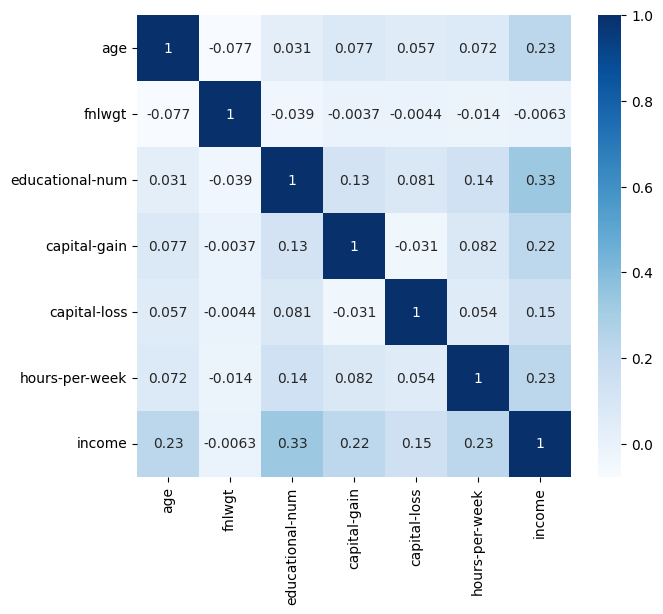

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

##Vizualization-09: workclass vs income

In [ ]:
#print unique values in the column "workclass"
print("data.workclass.unique() = \n", data.workclass.unique() )

data.workclass.unique() = 
 ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


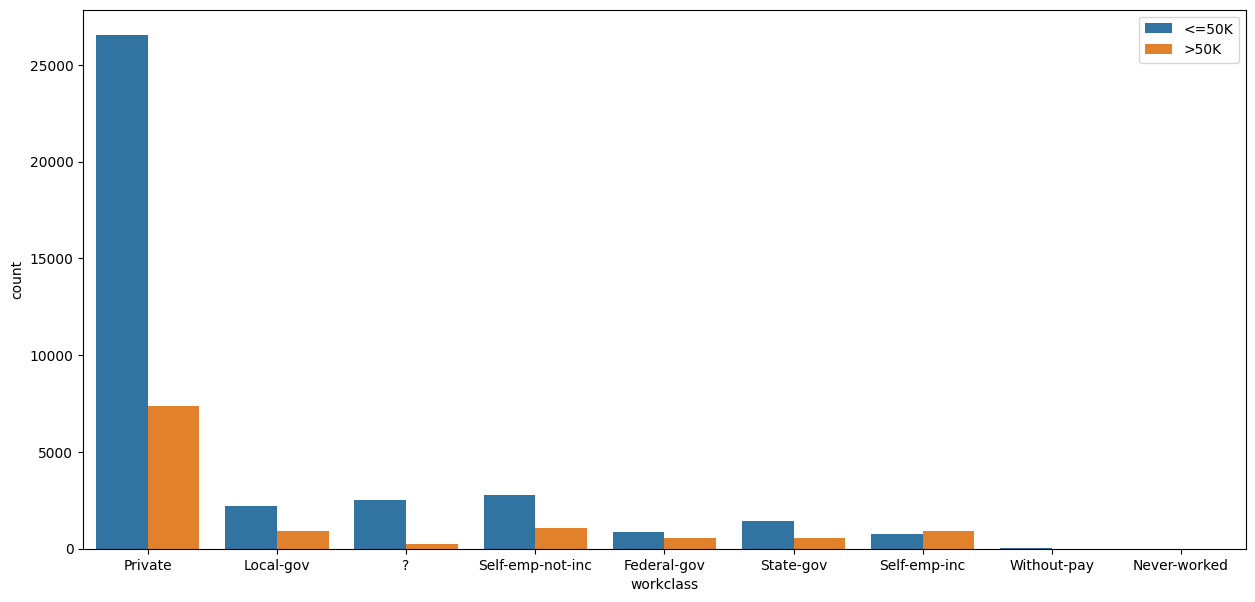

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="workclass", hue=data.income)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-10: education vs income

In [ ]:
#print unique values in the column "education"
print("data.education.unique() =\n",  data.education.unique() )

data.education.unique() =
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


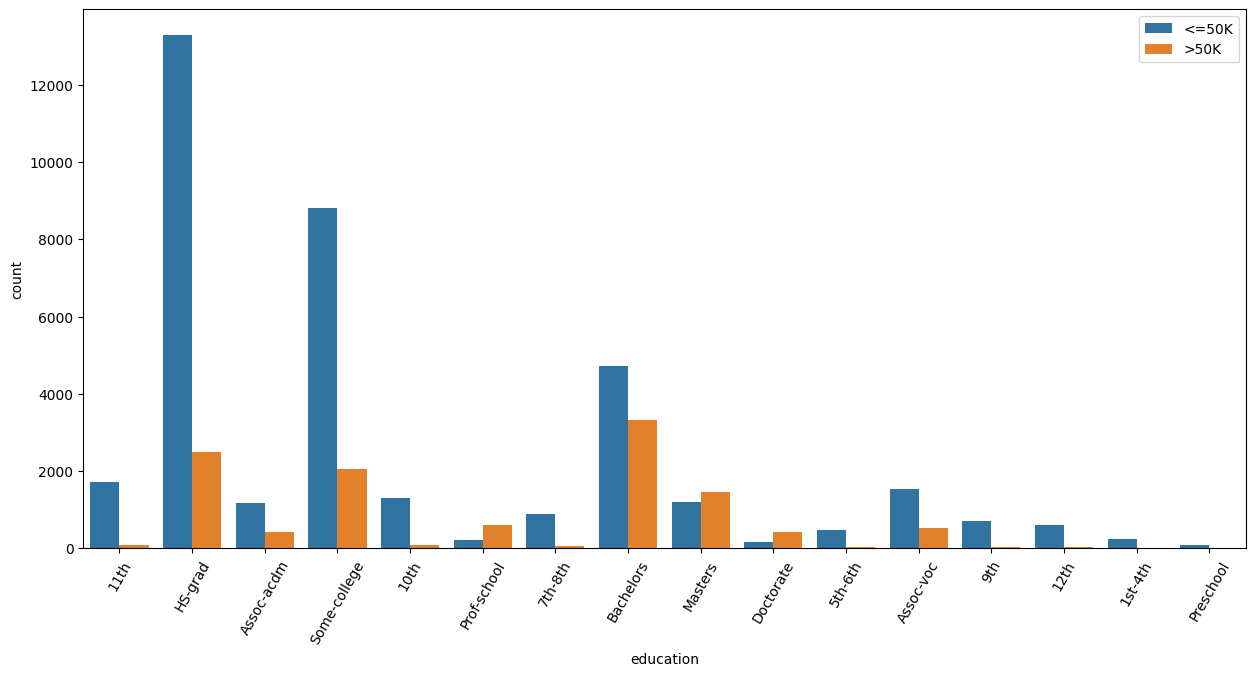

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="education", hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-11: marital-status vs income

In [ ]:
#print unique values in the column "marital-status"
print("data['marital-status'].unique() =\n",  data['marital-status'].unique() )

data['marital-status'].unique() =
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


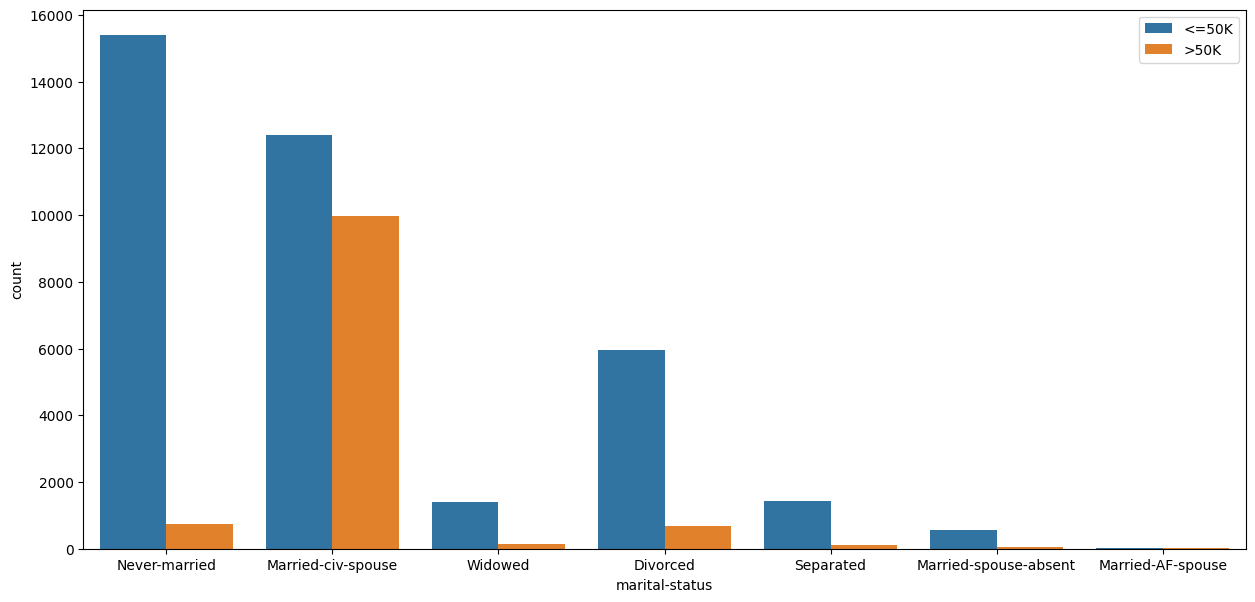

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x = data['marital-status'], hue=data.income)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-12: occupation vs income

In [ ]:
#print unique values in the column "occupation"
print("data.occupation.unique() =\n",  data.occupation.unique() )

data.occupation.unique() =
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


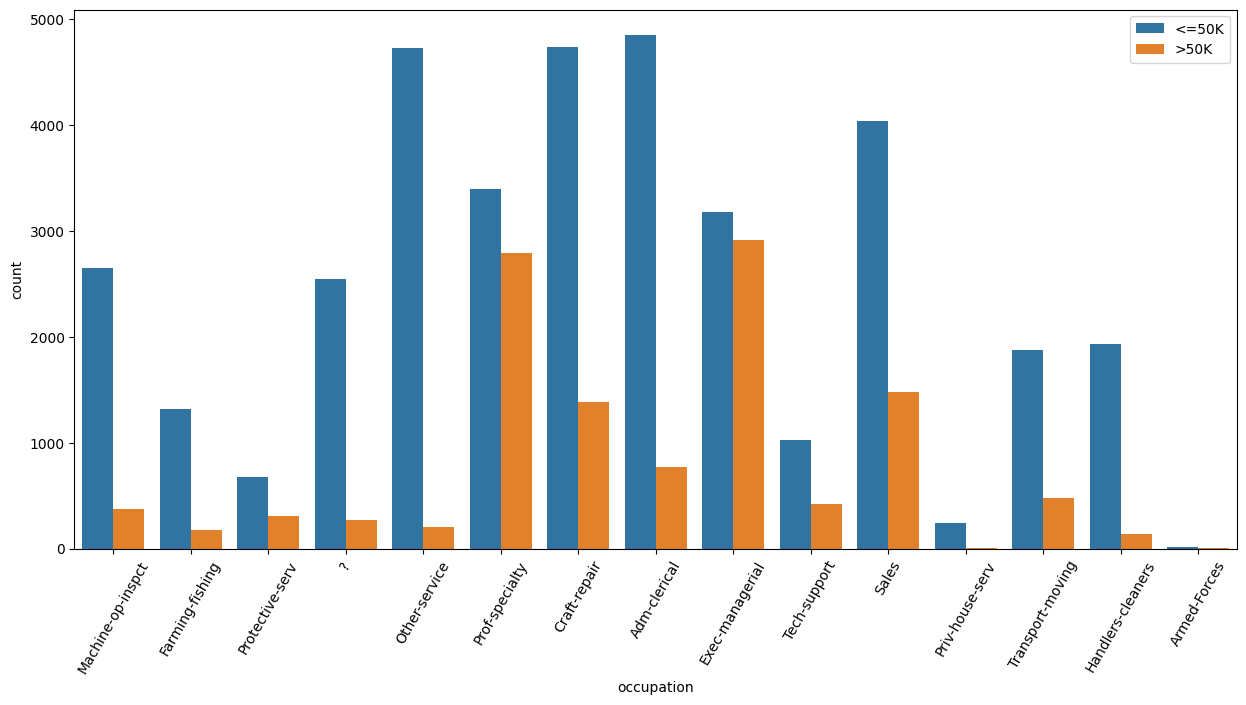

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="occupation", hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-13: relationship vs income

In [ ]:
#print unique values in the column "relationship"
print("data.relationship.unique() =\n")
print(data.relationship.unique())

data.relationship.unique() =

['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


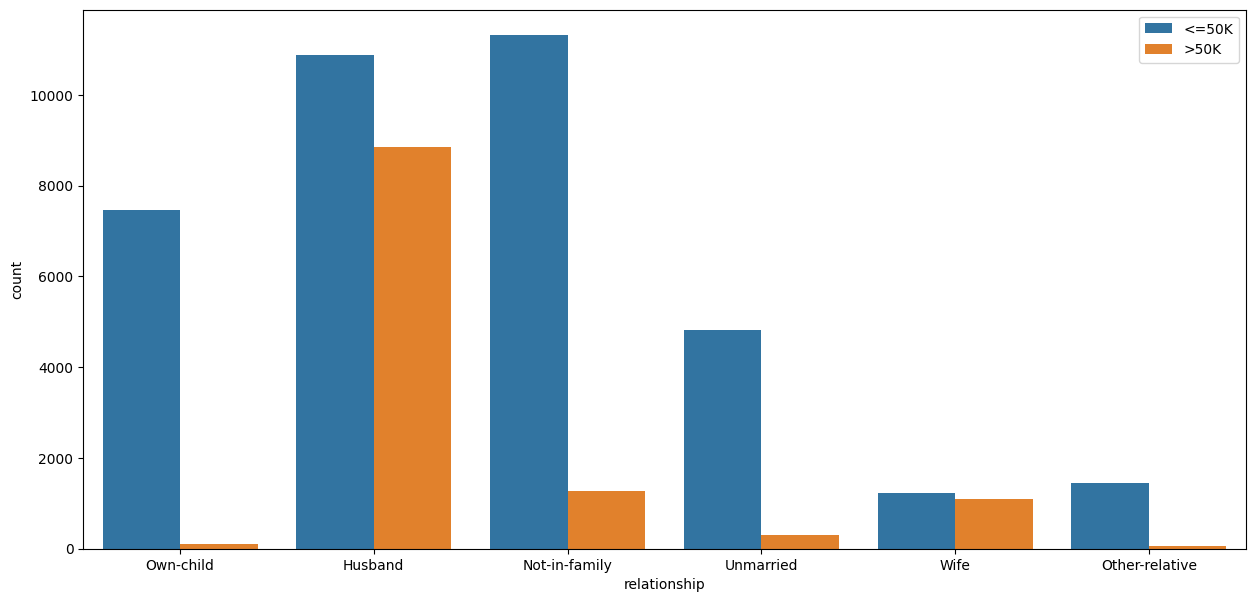

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="relationship", hue=data.income)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-14: gender vs income

In [ ]:
#print unique values in the column "gender"
print("data.gender.unique() =\n",  data.gender.unique() )

data.gender.unique() =
 ['Male' 'Female']


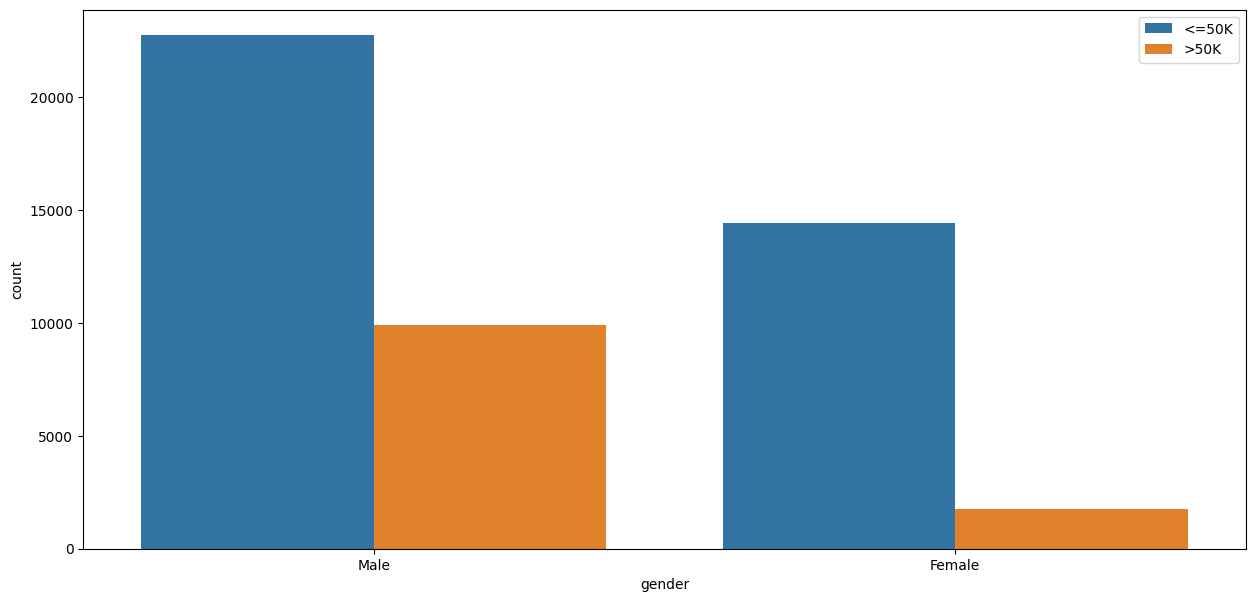

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x="gender", hue=data.income)
plt.legend(['<=50K', '>50K'])
plt.show()

##Vizualization-15: native-country vs income

In [ ]:
#print unique values in the column "native-country"
print("data['native-country'].unique() =\n",  data['native-country'].unique())

data['native-country'].unique() =
 ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


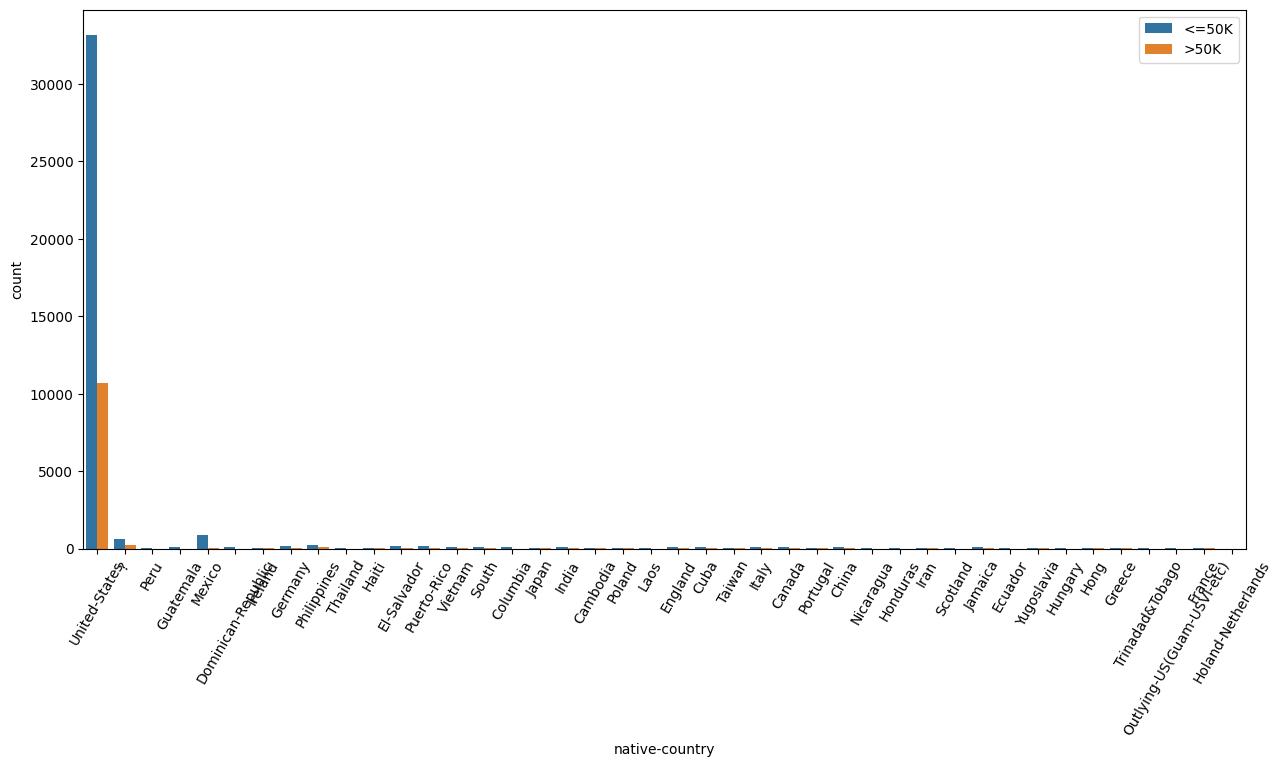

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=data, x='native-country', hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

##Data Preprocessing

In [ ]:
#Split the data in x and y

x=data.drop(['income'],axis=1)
y=data.income

In [ ]:
#print first 10 rows of x
x.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States


##Categorical data will converted into OneHotEncoding format

In [ ]:
x=pd.get_dummies(x)

In [ ]:
#Print the data after conversioon into OneHotEncoding
x.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,29,227026,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,63,104626,15,3103,0,32,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,24,369667,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,55,104996,4,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##print the list of column names havin numerical values

In [ ]:
numericalcols=list(data.select_dtypes(exclude='object').columns)
print( "numericalcols = ", numericalcols)

numericalcols =  ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


##To remove the last income column name from the list

In [ ]:
numericalcols.pop()
print( "numericalcols = ", numericalcols)

numericalcols =  ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


##Standardized the values of  numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[numericalcols]=scaler.fit_transform(x[numericalcols])

In [ ]:
print("After StandardScaler: x.head() = \n")
x.head()

After StandardScaler: x.head() = 



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##Data Splitting into 70% of training data and 30% of testing data

In [ ]:
x_train,x_test,y_trian,y_test=train_test_split(x,y,random_state=7,test_size=0.3)

##Train the model-01: LogisticRegression Algoritmns

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_trian)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###First Method to print the accuracy of LogisticRegression Algorithm

In [ ]:

accuracy_result =  model.score(x_test,y_test)
print("Accuracy of LogisticRegression : ",  accuracy_result )

Accuracy of LogisticRegression :  0.8497236060874906


###Second Method to print the accuracy of LogisticRegression Algorithm

In [ ]:
y_predictL=model.predict(x_test)
accuracy_result = accuracy_score(y_test,y_predictL)
print("Accuracy of LogisticRegression : ",  accuracy_result )

Accuracy of LogisticRegression :  0.8497236060874906


###Vizualization-16: Performance of LogisticRegression

<ipython-input-82-1d601f4906ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test,hist=False,label='Actual Values')
<ipython-input-82-1d601f4906ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_predictL,hist=False,label='Predicted Values')


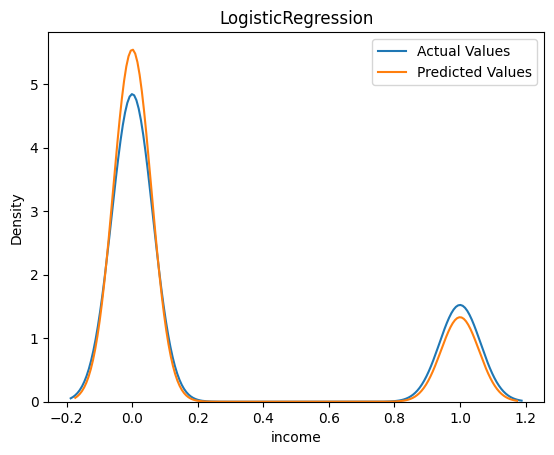

In [ ]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_predictL,hist=False,label='Predicted Values')
ax.set_title('LogisticRegression')
plt.legend()
plt.show()

###Print the confusion_matrix for prediction accuracy of LogicsticRegression

In [ ]:
matrix = confusion_matrix(y_test,y_predictL)
print("confusion_matrix for prediction accuracy of LogicsticRegression = \n")
matrix

confusion_matrix for prediction accuracy of LogicsticRegression = 



array([[10381,   766],
       [ 1436,  2070]])

###Vizualization-17: heatmap of confusion_matrix for LogicsticRegression

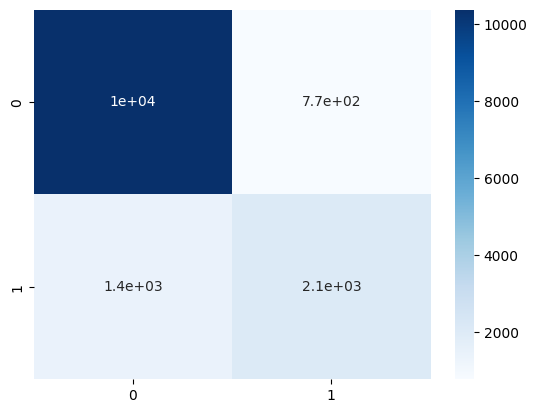

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predictL), annot=True, cmap='Blues')
plt.show()

##Train the model-02: SupportVectorClassifier Algoritmns

In [ ]:
model=SVC()
model.fit(x_train,y_trian)

SVC()

###First Method to print the accuracy of SupportVectorClassifier Algorithm

In [ ]:
accuracy_result =  model.score(x_test,y_test)
print("Accuracy of SupportVectorClassifier : ",  accuracy_result )

Accuracy of SupportVectorClassifier :  0.8518392138128711


###Second Method to print the accuracy of SupportVectorClassifier Algorithm

In [ ]:
y_predicS=model.predict(x_test)
accuracy_result = accuracy_score(y_test,y_predicS)
print("Accuracy of SupportVectorClassifier : ",  accuracy_result )

Accuracy of SupportVectorClassifier :  0.8518392138128711


###Vizualization-18: Performance of SupportVectorClassifier

<ipython-input-88-8a52d347e00a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test,hist=False,label='Actual Values')
<ipython-input-88-8a52d347e00a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_predicS,hist=False,label='Predicted Values')


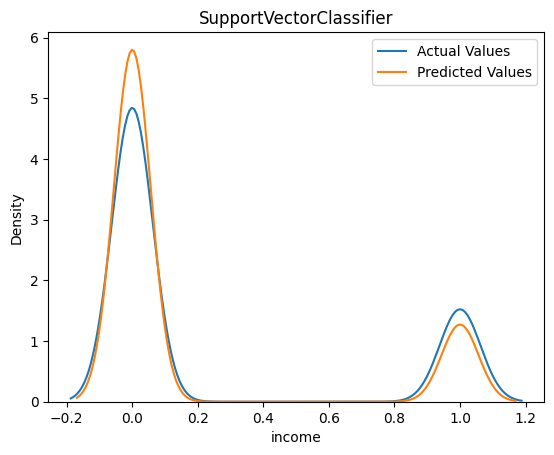

In [ ]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_predicS,hist=False,label='Predicted Values')
ax.set_title('SupportVectorClassifier')
plt.legend()
plt.show()

###Print the confusion_matrix for prediction accuracy of SupportVectorClassifier

In [ ]:
matrix = confusion_matrix(y_test,y_predictL)
print("confusion_matrix for prediction accuracy of SupportVectorClassifier = \n")
print(matrix)

confusion_matrix for prediction accuracy of SupportVectorClassifier = 

[[10381   766]
 [ 1436  2070]]


###Vizualization-19: heatmap of confusion_matrix for SupportVectorClassifier

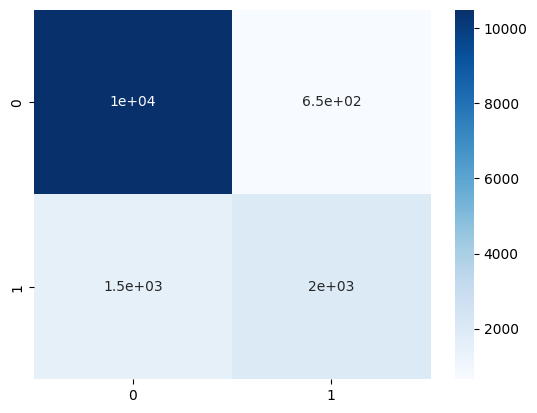

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predicS),annot=True,cmap='Blues')
plt.show()